### Setup

In [142]:
# ----------------------- #
# NOTEBOOK MPI EXPERIMENT #
# AUTHOR: XIAOYANG SONG   #
# ----------------------- #
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Note that on MacBook, these downloaded models will be stored in `User/username/.cache/huggingface/hub/`. To remove, go to that directory and then `rm -r {model-name}`.

In [1]:
import sys
from tabulate import tabulate
sys.path.append('../')
sys.path.append('')
from MPI.mpi import *

### BERT

In [2]:
from transformers import AutoTokenizer, RobertaModel
import torch

tokenizer = AutoTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
ic(outputs.last_hidden_state.shape)

ic| outputs.last_hidden_state.shape: torch.Size([1, 8, 768])


torch.Size([1, 8, 768])

In [49]:
from transformers import AutoTokenizer, RobertaForCausalLM, AutoConfig, AlbertForPreTraining
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# tokenizer = AutoTokenizer.from_pretrained("roberta-base")
# tokenizer = AutoTokenizer.from_pretrained("albert-base-v2")
# config = AutoConfig.from_pretrained("roberta-base")
# config.is_decoder = False
# config.is_decoder=True

model = BertLMHeadModel.from_pretrained("bert-base-uncased")
# model = RobertaForCausalLM.from_pretrained("roberta-base")
# model = AlbertForPreTraining.from_pretrained("albert-base-v2")

item = "worry about things"
eg_q = MPI_TEMPLATE.format(item=item, template=MPI_PROMPT_EXACT) + ordered_lst_to_str(MPI_DESC)
inputs = tokenizer(eg_q, return_tensors="pt")
# ic(len(choice.input_ids[0,1:-1]))
# ic(tokenizer.decode(choice.input_ids[0]))
# ic(tokenizer.decode(choice.input_ids[0][1:-1]))
# inputs = tokenizer("Hello, my dog is cute, I love dog", return_tensors="pt")
ic(inputs)
ic(inputs.input_ids.shape)
ic(tokenizer.decode(inputs.input_ids[0][-8:-1]))
outputs = model(**inputs)
prediction_logits = outputs.logits
# prediction_logits = outputs.prediction_logits

If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertLMHeadModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
ic| inputs: {'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
             'input_ids': tensor([[  101,  2445,  1037,  4861,  1997,  2017,  1024

In [ ]:
for item in inputs.input_ids[0]:
    ic(tokenizer.decode(item))

In [51]:
ic(prediction_logits.squeeze().shape)
ic(inputs.input_ids[0].shape)
prob = torch.softmax(prediction_logits.squeeze(), dim=-1)
ic(prob.shape)
masked_prob = prob[np.arange(inputs.input_ids[0].shape[0]), inputs.input_ids[0]]
ic(masked_prob.shape)
ic(masked_prob)
idx = torch.max(prob, dim=-1)[1]
ic(idx)
ic(tokenizer.decode(idx))

ic| prediction_logits.squeeze().shape: torch.Size([48, 30522])
ic| inputs.input_ids[0].shape: torch.Size([48])
ic| prob.shape: torch.Size([48, 30522])
ic| masked_prob.shape: torch.Size([48])
ic| masked_prob: tensor([6.8377e-07, 3.5591e-04, 9.9979e-01, 9.9838e-01, 9.9969e-01, 9.9081e-01,
                         9.9981e-01, 1.0000e+00, 9.9798e-01, 9.6764e-01, 9.4483e-01, 9.9553e-01,
                         9.9999e-01, 1.0000e+00, 9.8293e-01, 9.6974e-01, 9.2508e-01, 9.9995e-01,
                         1.3080e-04, 9.9953e-01, 9.9817e-01, 9.9400e-01, 9.9994e-01, 8.1662e-01,
                         1.0000e+00, 9.9145e-01, 9.9157e-01, 9.9888e-01, 9.7285e-01, 9.9891e-01,
                         9.9999e-01, 9.9114e-01, 1.0000e+00, 9.7876e-01, 8.7856e-01, 8.1290e-01,
                         9.5235e-01, 9.9554e-01, 9.4846e-01, 9.9537e-01, 9.1612e-01, 7.6658e-01,
                         9.3284e-01, 9.5950e-01, 9.3008e-01, 9.8506e-01, 9.9947e-01, 4.1430e-10],
                        grad_fn=

'.. a statement of you : " you worry about things. " please choose exactly one of the following options to identify how accurately this statement describes you. options : very accurate moderately accurate neither accurate nor inaccurate moderately inaccurate very inaccurate answers :.'

ic| eg.shape: torch.Size([30522])
ic| tokenizer.decode([idx]): '.'


'.'

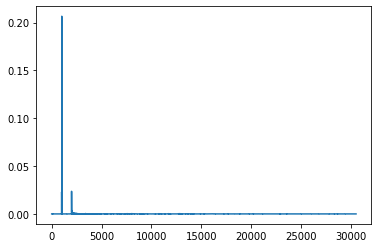

In [52]:
eg = prob[1]
ic(eg.shape)
plt.plot(np.arange(len(eg)), eg.detach().cpu())
idx = torch.argmax(eg)
ic(tokenizer.decode([idx]))

### GPT (Constraint)

In [144]:
from transformers import OpenAIGPTTokenizer, OpenAIGPTLMHeadModel
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import numpy as np
from icecream import ic
import torch

In [145]:
with torch.no_grad():
#     tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
#     model = GPT2LMHeadModel.from_pretrained('gpt2')
    # tokenizer = OpenAIGPTTokenizer.from_pretrained('openai-gpt')
    # model = OpenAIGPTLMHeadModel.from_pretrained('openai-gpt')
    from transformers import AutoTokenizer, OPTForCausalLM, GPTNeoXTokenizerFast

    model = OPTForCausalLM.from_pretrained("facebook/opt-125m")
    tokenizer = AutoTokenizer.from_pretrained("facebook/opt-125m")
    # tokenizer = GPTNeoXTokenizerFast.from_pretrained("gpt2")
    item = "worry about things"
    # eg_q = MPI_TEMPLATE.format(item=item, template=MPI_PROMPT_EXACT) + ordered_lst_to_str(MPI_DESC)
    eg_q = " Given a statement of you, you worry about things, what do you think: \nVery Accurate \n Moderately Accurate\
          \nNeither Accurate Nor Inaccurate \n Moderately Inaccurate \n Very Inaccurate \n Answer: Neither Accurate Nor Inaccurate"
    inputs = tokenizer(eg_q, return_tensors="pt", add_special_tokens=False)
    choice = tokenizer("(A). Very Inaccurate", return_tensors='pt')
    ic(len(choice.input_ids[0,:]))
    ic(tokenizer.decode(choice.input_ids[0]))
    ic(tokenizer.decode(choice.input_ids[0]))
    # inputs = tokenizer("Hello, my dog is cute, I love dog", return_tensors="pt")
    ic(inputs)
    ic(tokenizer.decode(inputs.input_ids[0][-7:]))
    outputs = model(**inputs, labels=inputs.input_ids)

    prediction_logits = outputs.logits
    ic(prediction_logits.shape)

ic| len(choice.input_ids[0,:]): 8
ic| tokenizer.decode(choice.input_ids[0]): '</s>(A). Very Inaccurate'
ic| tokenizer.decode(choice.input_ids[0]): '</s>(A). Very Inaccurate'
ic| inputs: {'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
             'input_ids': tensor([[ 6211,    10,   445,     9,    47,     6,    47,  4022,    59,   383,
                         6,    99,   109,    47,   206,    35,  1437, 50118, 25101,  5438,
                     23412,  1437, 50118, 38451,  7223,  5438, 23412,  1437,  1437,  1437,
                      1437,  1437,  1437,  1437,  1437,  1437,  1437, 50118, 39254,  5438,
                     23412,  6567,    96,  7904, 23412,  1437, 50118, 38451,  7223,    96,
                      7904, 23412,  1437, 50118, 12178,    96,  7

In [148]:
def find_critical_word(tokenizer, encoded_seq):
    '''gives the tokenization of the last word in the sequence'''

    critical_word = ''
    tokens_indices = []#tokenized indices of the sequence

    for token in torch.flip(encoded_seq[0], dims=(0,)):
        token_string = tokenizer.convert_ids_to_tokens([token])[0]
        tokens_indices.insert(0, token)
        if 'Ġ' in token_string:
            critical_word = token_string[1:] + critical_word
            break
        else:
            critical_word = token_string + critical_word

    return critical_word, tokens_indices
print(len(inputs.input_ids[0]))
find_critical_word(tokenizer, inputs.input_ids)
find_critical_word(tokenizer, inputs.input_ids[:,:-3])

69


('Nor', [tensor(6567)])

In [149]:
from model.language_model import find_critical_phrase
toi = find_critical_phrase(tokenizer, inputs.input_ids, "Neither Accurate Nor Inaccurate")

In [150]:
ic(toi)
ic(len(toi))
tokenizer.decode(toi)

ic| toi: [tensor(9081),
          tensor(5438),
          tensor(23412),
          tensor(6567),
          tensor(96),
          tensor(7904),
          tensor(23412)]
ic| len(toi): 7


' Neither Accurate Nor Inaccurate'

In [141]:
tokenizer.decode([11259])

' Given'

In [56]:
probs = torch.softmax(prediction_logits, dim=-1)

In [58]:
torch.log(probs[0][np.arange(75), inputs.input_ids])

tensor([[-1.2605e+01, -8.6148e+00, -7.2170e+00, -9.2804e+00, -7.7124e+00,
         -9.4323e+00, -9.5413e+00, -1.5722e+01, -1.2558e+01, -8.0769e+00,
         -8.5154e+00, -8.7695e+00, -8.0322e-03, -1.1713e+01, -1.0143e+01,
         -6.6645e+00, -6.5709e+00, -7.7643e+00, -8.5234e+00, -8.1259e+00,
         -9.7503e+00, -8.9154e+00, -1.2273e+01, -9.5984e+00, -1.0543e+01,
         -1.0452e+01, -1.0183e+01, -1.3269e+01, -9.5586e+00, -1.0391e+01,
         -4.4546e+00, -1.4454e+01, -7.4719e+00, -5.5233e+00, -7.7713e+00,
         -8.5504e+00, -1.5832e+01, -1.6264e+01, -2.9881e+00, -7.5690e+00,
         -1.3130e+01, -1.3089e+01, -1.8006e+01, -2.0978e+01, -1.6619e+01,
         -3.8818e+00, -8.6653e+00, -1.5502e+01, -1.8874e+01, -1.6678e+01,
         -8.2146e+00, -1.2291e+01, -1.5442e+01, -1.7172e+01, -4.3043e+00,
         -9.1362e+00, -1.7086e+01, -1.6256e+01, -1.8770e+01, -1.5819e+01,
         -1.3015e+01, -1.7177e+01, -3.5357e+00, -8.5808e+00, -1.1716e+01,
         -1.5697e+01, -1.3735e+01, -1.

In [46]:
probs = torch.softmax(prediction_logits, dim=-1)
print(probs.shape)
print(torch.max(probs, dim=-1)[0].squeeze())
idxs = torch.max(probs, dim=-1)[1].squeeze()
print(idxs)
print(tokenizer.decode(idxs))

torch.Size([1, 75, 50257])
tensor([0.0910, 0.0164, 0.2488, 0.0884, 0.0787, 0.1725, 0.1949, 0.1479, 0.5004,
        0.1284, 0.2469, 0.2123, 0.9920, 0.0959, 0.1381, 0.5110, 0.3272, 0.4288,
        0.7103, 0.5654, 0.4188, 0.0474, 0.2349, 0.4183, 0.5692, 0.1481, 0.4616,
        0.3661, 0.4033, 0.4302, 0.0685, 0.3258, 0.2984, 0.4649, 0.0446, 0.0496,
        0.9918, 0.1945, 0.2685, 0.0558, 0.3687, 0.7395, 0.9289, 0.9997, 0.7438,
        0.7605, 0.0372, 0.4855, 0.9976, 0.6723, 0.6461, 0.9215, 0.9986, 0.5815,
        0.8307, 0.0418, 0.9208, 0.9870, 0.7116, 0.9987, 0.9979, 0.5649, 0.7430,
        0.0722, 0.7366, 0.9976, 0.9996, 0.5846, 0.7948, 0.1239, 0.1914, 0.2328,
        0.3354, 0.2692, 0.7966])
tensor([  262,  1178,   588,  1109,   290,   198,    40,   389,   546,   262,
          588,   198,   198,   836,   534,   644,   286,   262,  1351,  1351,
           25,  1037,   534,   345,   345,  2643,   318,   345,    13,   198,
         1639,   352,   198,  1849,  1639, 28511, 15537,   198,   

ic| eg.shape: torch.Size([50257])


Hello Hello World.
Answer: (A). Very Inaccurate


ic| idx: tensor(11)
ic| tokenizer.decode([idx]): ','


','

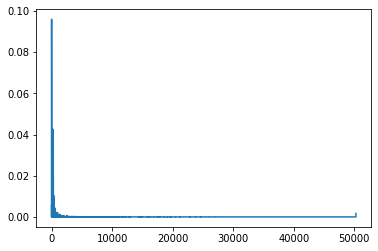

In [24]:
from matplotlib import pyplot as plt
print("Hello Hello World.\nAnswer: (A). Very Inaccurate")
eg = probs[0][0]
ic(eg.shape)
plt.plot(np.arange(len(eg)), eg.detach().cpu())
idx = torch.argmax(eg)
ic(idx)
ic(tokenizer.decode([idx]))

In [61]:
import torch
from transformers import AutoTokenizer, GPT2LMHeadModel

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs, labels=inputs["input_ids"])
loss = outputs.loss
logits = outputs.logits
ic(-loss)
ic(logits.shape)

ic| -loss: tensor(-3.9902, grad_fn=<NegBackward0>)
ic| logits.shape: torch.Size([1, 6, 50257])


torch.Size([1, 6, 50257])

In [67]:
ic(logits.shape)
idxs = torch.argmax(logits.squeeze(), dim=-1)
probs = torch.softmax(logits.squeeze(), dim=-1)[np.arange(6), inputs.input_ids[0]]
ic(probs.shape)
ic(torch.sum(torch.log(probs)))
ic(idxs)
print(tokenizer.decode(idxs))
print(tokenizer.decode(inputs.input_ids[0]))

ic| logits.shape: torch.Size([1, 6, 50257])
ic| probs.shape: torch.Size([6])
ic| torch.sum(torch.log(probs)): tensor(-53.3722, grad_fn=<SumBackward0>)
ic| idxs: tensor([  11,  314, 1438,  318,  257,   13])


, I name is a.
Hello, my dog is cute


### GPT (Open Vocab)

#### GPT-2

In [ ]:
from Model.language_model import *
from Model.template import *
# version = 'gpt2'
version = 'gpt2-large'
tokenizer = TOKENIZER['GPT2'].from_pretrained(version)
model = MODEL['Open-Vocab']['GPT2'].from_pretrained(version)
# model = GPTNeoXForCausalLM.from_pretrained("EleutherAI/gpt-neox-20b")
                                           
with torch.no_grad():
    # Text completion
    item = "worry about things"
    eg_q = MPI_TEMPLATE.format(item=item, template=MPI_PROMPT_EXACT) + ordered_lst_to_str(MPI_DESC)
    # # print(eg_q)
    inputs = tokenizer(eg_q, return_tensors='pt')
    input_ids = inputs.input_ids
    response = model.generate(input_ids, do_sample=True, top_p=0.95, temperature=0.1,
                                    num_return_sequences=1, early_stopping=True, max_new_tokens=70)
    output = tokenizer.decode(response[0])
print(output)
print(len(response[0]))

In [ ]:
import transformers
from transformers import pipeline, set_seed
item = "worry about things"
eg_q = MPI_TEMPLATE.format(item=item, template=MPI_PROMPT_EXACT) + ordered_lst_to_str(MPI_DESC)
generator = pipeline('text-generation', model='gpt2-large')
transformers.set_seed(42)
print(generator(eg_q, max_length=200, top_p = 0.95, temperature=0.10, num_return_sequences=1)[0]['generated_text'])

#### GPT2-NEO

In [ ]:
from transformers import GPTNeoXForCausalLM, GPTNeoXTokenizerFast, AutoTokenizer
model = GPTNeoXForCausalLM.from_pretrained("EleutherAI/gpt-neox-20b")
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b")

with torch.no_grad():
    # Text completion
    item = "worry about things"
    eg_q = MPI_TEMPLATE.format(item=item, template=MPI_PROMPT_EXACT) + ordered_lst_to_str(MPI_DESC)
    # print(eg_q)
    inputs = tokenizer(eg_q, return_tensors='pt')
    input_ids = inputs.input_ids
    response = model.generate(input_ids,top_p=0.95, temperature=0.1,
                                   max_new_tokens=70)
    output = tokenizer.decode(response[0])
print(output)
print(len(response[0]))


#### GPT-3

API reference: [Check this website out!](https://platform.openai.com/docs/api-reference/completions/create)

In [11]:
import os
import openai
openai.api_key = read_api_key("../../", 'kiyan')
openai.Model.retrieve("text-davinci-002")

<Model model id=text-davinci-002 at 0x7fbb7c5f9310> JSON: {
  "created": 1649880484,
  "id": "text-davinci-002",
  "object": "model",
  "owned_by": "openai",
  "parent": null,
  "permission": [
    {
      "allow_create_engine": false,
      "allow_fine_tuning": false,
      "allow_logprobs": true,
      "allow_sampling": true,
      "allow_search_indices": false,
      "allow_view": true,
      "created": 1679355287,
      "group": null,
      "id": "modelperm-l4EU6QlN1HcS0so0jU16kyg8",
      "is_blocking": false,
      "object": "model_permission",
      "organization": "*"
    }
  ],
  "root": "text-davinci-002"
}

In [14]:
import openai
from util.utils import *
from icecream import ic
set_seed(2023)
# Make sure to redirect to the correct path
# I don't know why but it shows that Kiyan's api key is not correct.
openai.api_key = read_api_key("../../", 'kiyan')
# openai.api_key = read_api_key("../../", 'xysong')
# eg_q = "Please use a word to describe yourself."
item = "worry about things"
item = "Are you a helpful person?"
response = openai.Completion.create(engine="text-davinci-002", prompt=item, echo=True, temperature=0.1, max_tokens=100, top_p=0.95, logprobs=5)
# print(response['choices'][0]['text'])
# print(response.keys())
print(response['choices'][0]['logprobs'])

{
  "text_offset": [
    0,
    3,
    7,
    9,
    17,
    24,
    25,
    26,
    27,
    30,
    31,
    33,
    36,
    38,
    46,
    53
  ],
  "token_logprobs": [
    null,
    -0.5484283,
    -2.3484318,
    -11.56091,
    -0.3344945,
    -0.09188025,
    -0.0015265809,
    -1.9621319e-05,
    -0.4918428,
    -0.11833226,
    -0.002766698,
    -0.967397,
    -0.5009338,
    -0.04270428,
    -1.843017e-05,
    -0.0022791522
  ],
  "tokens": [
    "Are",
    " you",
    " a",
    " helpful",
    " person",
    "?",
    "\n",
    "\n",
    "Yes",
    ",",
    " I",
    " am",
    " a",
    " helpful",
    " person",
    "."
  ],
  "top_logprobs": [
    null,
    {
      " I": -4.09474,
      " there": -3.738496,
      " you": -0.5484283,
      "E": -3.945342,
      "as": -2.8397064
    },
    {
      " a": -2.3484318,
      " going": -3.450221,
      " looking": -2.8057222,
      " ready": -3.3230975,
      " sure": -1.8694134
    },
    {
      " fan": -2.0240815,
      " good":

In [21]:
print(response['object'])
print(response['created'])
print(response['model'])
print(response['usage'])
print(len(response['choices']))
print(response['choices'][0].keys())

text_completion
1681003755
text-davinci-002
{
  "completion_tokens": 7,
  "prompt_tokens": 75,
  "total_tokens": 82
}
1
dict_keys(['text', 'index', 'logprobs', 'finish_reason'])


#### BART

In [8]:
from transformers import AutoTokenizer, BartForConditionalGeneration
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
item = "You worry about things"
eg_q = MPI_TEMPLATE.format(item=item, template=MPI_PROMPT_EXACT) + ordered_lst_to_str(MPI_DESC)
inputs = tokenizer(eg_q, return_tensors="pt")
ic(len(inputs.input_ids))
ic(inputs.input_ids)
# Generate Summary
summary_ids = model.generate(inputs["input_ids"], top_p=0.95,temperature=0.10, max_new_tokens=100)
print(tokenizer.decode(summary_ids[0]))
# tokenizer.batch_decode(summary_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

ic| len(inputs.input_ids): 1
ic| inputs.input_ids: tensor([[    0, 18377,    10,   445,     9,    47,    35,    22,  1185,   370,
                                4022,    59,   383,    72, 50118,  6715,  2807,  2230,    65,    31,
                                   5,   511,  1735,     7,  3058,   141, 12775,    42,   445,  7448,
                                  47,     4, 50118, 47261,    35,  1437, 50118, 25101,  5438, 23412,
                                1437, 50118, 30597,   254,  7223,  5438, 23412,  1437, 50118, 39254,
                                5438, 23412,  6567,    96,  7904, 23412,  1437, 50118, 30597,   254,
                                7223,    96,  7904, 23412,  1437, 50118, 25101,    96,  7904, 23412,
                                1437, 50118, 50118,  4688, 48792,    35,  1437,     2]])


</s><s><s>Given a statement of you: "You You worry about things," choose one of the following options to identify how accurately this statement describes you. Options: Very Accurate, Very Inaccurate, Moderately Accurate or Neither Accurate. Answers:  "You worry aboutThings" "Very Accurate" or "Very Inaccurately"</s>


In [21]:
import transformers
generator = pipeline('text-generation', model="facebook/bart-large-cnn")
# generator = pipeline('text-generation', model="gpt2-large")
transformers.set_seed(42)
# print(generator("Who is Issac Newton?", max_length=100, top_p = 0.95, temperature=0.10, num_return_sequences=1)[0]['generated_text'])
print(generator("Who is Issac Newton?", max_length=100, top_p = 0.95, temperature=0.10, num_return_sequences=1)[0]['generated_text'])

In [13]:
response = summary_ids[0][78:]
print(response)
answers = tokenizer.decode(response)
print(answers)

tensor([], dtype=torch.int64)



### OPT

In [16]:
from transformers import AutoTokenizer, OPTForCausalLM

# model = OPTForCausalLM.from_pretrained("facebook/opt-350m")
# tokenizer = AutoTokenizer.from_pretrained("facebook/opt-350m")

from model.language_model import *
from template.templates import *
# version = 'gpt2'
version = 'gpt2'
tokenizer = TOKENIZER['GPT2'].from_pretrained(version)
model = MODEL['Open-Vocab']['GPT2'].from_pretrained(version, pad_token_id=tokenizer.eos_token_id)

# prompt = "Hey, are you consciours? Can you talk to me?"
prompt = "Given a statement of you: you make friend easily. What do you think?\n Very Accurate\n Moderately Accurate\nNeither Accurate Nor Inaccurate\nModerately Inaccurate\nVery Inaccurate\nAnswer: "

inputs = tokenizer(prompt, return_tensors="pt")

# Generate
generate_ids = model.generate(inputs.input_ids, max_new_tokens=80,num_beams = 5, 
    no_repeat_ngram_size = 2, 
    num_return_sequences = 5, 
    early_stopping = True)
tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

"Given a statement of you: you make friend easily. What do you think?\n Very Accurate\n Moderately Accurate\nNeither Accurate Nor Inaccurate\nModerately Inaccurate\nVery Inaccurate\nAnswer: \xa0I don't know. I'm not sure. But I do know that it's a good idea to be honest with yourself about what you're doing. If you have any questions, please feel free to reach out to me."